In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
import pandas as pd
from PIL import Image
import tensorflow as tf

C:\Users\Ravindra Singh\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Ravindra Singh\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Ravindra Singh\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Ravindra Singh\anaconda3\lib\site-packages\tensorflow\python\framework

In [2]:
train_path = r"C:\Users\Ravindra Singh\Desktop\FNF\train"
valid_path = r"C:\Users\Ravindra Singh\Desktop\FNF\val"
test_path = r"C:\Users\Ravindra Singh\Desktop\FNF\test"

In [3]:
def load_images(path):
    images = []
    label =[]
    for i in os.listdir(path):
        for j in os.listdir(path + '/' + i):
            img_path = path + '/' + i + '/' + j
            img = Image.open(img_path).convert('L')
            img = img.resize((100, 100))
            img = np.array(img)
            img = img.reshape((1,100,100))
            images.append(img)
            if i == 'fire':
                label.append(0)
            elif i == 'no_fire':
                label.append(1)
            else:
                pass
    images = np.array(images)
    return(images, label)     

In [4]:
train_images, train_label = load_images(train_path)
test_images, test_label = load_images(test_path)
x_val, y_val = load_images(valid_path)

In [5]:
test_label[2]

0

In [6]:
print(train_images.shape)
print(len(train_label))
print(test_images.shape)
print(len(test_label))
print(x_val.shape)
print(len(y_val))

(6840, 1, 100, 100)
6840
(400, 1, 100, 100)
400
(1040, 1, 100, 100)
1040


In [7]:
train_images = np.reshape(train_images, (-1, 1,100, 100))
print(train_images.shape)
test_images = np.reshape(test_images, (-1, 1, 100, 100))
print(test_images.shape)
x_val = np.reshape(x_val, (-1, 1, 100, 100))
print(x_val.shape)

(6840, 1, 100, 100)
(400, 1, 100, 100)
(1040, 1, 100, 100)


In [8]:
from keras import layers, models
model = models.Sequential()
model.add(layers.Conv2D(20, (3,3), strides=2, activation='relu', input_shape=(1, 100, 100), data_format='channels_first'))
model.add(layers.Dropout(0.2))
model.add(layers.MaxPooling2D((2, 2), strides= 2, data_format='channels_first'))

model.add(layers.Conv2D(40, (3, 3), strides=2, activation='relu', data_format='channels_first'))
model.add(layers.Dropout(0.2))
model.add(layers.MaxPooling2D((2, 2), strides= 2, data_format='channels_first'))
model.add(layers.Conv2D(40, (3, 3), strides=2, activation='relu', data_format='channels_first'))
model.add(layers.Dropout(0.2))
model.add(layers.MaxPooling2D((2, 2), strides= 2, data_format='channels_first'))
model.add(layers.Flatten())
model.add(layers.Dense(40, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 20, 49, 49)        200       
_________________________________________________________________
dropout_1 (Dropout)          (None, 20, 49, 49)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 20, 24, 24)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 40, 11, 11)        7240      
_________________________________________________________________
dropout_2 (Dropout)          (None, 40, 11, 11)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 40, 5, 5)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 40, 2, 2)          14440     
__________

In [9]:
model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics = ['acc'])

In [14]:
history = model.fit(train_images, train_label, epochs=10, batch_size = 64,
                    validation_data=(x_val, y_val))

Train on 6840 samples, validate on 1040 samples
Epoch 1/10
6840/6840 [==============================] - 32s 5ms/step - loss: 0.2806 - acc: 0.8776 - val_loss: 0.3418 - val_acc: 0.8683
Epoch 2/10
6840/6840 [==============================] - 33s 5ms/step - loss: 0.2711 - acc: 0.8845 - val_loss: 0.3345 - val_acc: 0.8779
Epoch 3/10
6840/6840 [==============================] - 33s 5ms/step - loss: 0.2661 - acc: 0.8877 - val_loss: 0.3896 - val_acc: 0.8346
Epoch 4/10
6840/6840 [==============================] - 34s 5ms/step - loss: 0.2628 - acc: 0.8883 - val_loss: 0.3440 - val_acc: 0.8615
Epoch 5/10
6840/6840 [==============================] - 35s 5ms/step - loss: 0.2523 - acc: 0.8937 - val_loss: 0.3270 - val_acc: 0.8750
Epoch 6/10
6840/6840 [==============================] - 34s 5ms/step - loss: 0.2659 - acc: 0.8849 - val_loss: 0.3334 - val_acc: 0.8798
Epoch 7/10
6840/6840 [==============================] - 34s 5ms/step - loss: 0.2490 - acc: 0.8985 - val_loss: 0.3353 - val_acc: 0.8644
Epoch 8

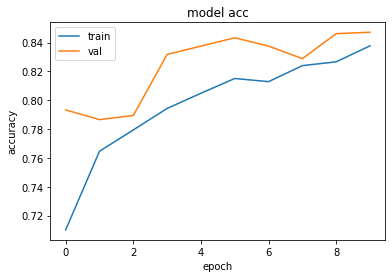

In [11]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model acc')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [23]:
test_loss , test_acc = model.evaluate(test_images, test_label)
print("Test Accuracy", test_acc)

400/400 [==============================] - 1s 2ms/step
Test Accuracy 0.9325


In [24]:
predictions = model.predict(test_images, steps=1, verbose=1)
predictions

1/1 [==============================] - 0s 453ms/step


array([[3.30259740e-01],
       [3.95119667e-01],
       [3.61669153e-01],
       [3.41906965e-01],
       [3.69367003e-01],
       [2.21614122e-01],
       [4.76768315e-02],
       [2.05961376e-01],
       [1.17814243e-02],
       [2.91269839e-01],
       [1.65393054e-02],
       [4.52828199e-01],
       [6.35312796e-01],
       [1.92267805e-01],
       [8.50588679e-02],
       [1.93362802e-01],
       [3.93002450e-01],
       [4.22360450e-01],
       [9.49283540e-02],
       [4.49522614e-01],
       [5.96832156e-01],
       [9.19997692e-05],
       [0.00000000e+00],
       [0.00000000e+00],
       [5.02049387e-01],
       [3.99428606e-03],
       [0.00000000e+00],
       [5.33979237e-02],
       [3.43769789e-03],
       [5.13264298e-01],
       [3.32748860e-01],
       [4.09522355e-02],
       [6.40913546e-01],
       [7.02410579e-01],
       [4.04479146e-01],
       [2.08616257e-07],
       [1.34170055e-03],
       [4.51538265e-02],
       [1.39041245e-02],
       [5.63439727e-02],


In [25]:
len(predictions)

400

In [26]:
pred = model.predict(test_images, steps = 1)

In [27]:
r_pred = []
for i in range(len(pred)):
    if pred[i] >= 0.5:
        r_pred.append(1)
    else:
        r_pred.append(0)

In [28]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    print(cm)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [29]:
cm = confusion_matrix(test_label, r_pred)

Confusion matrix, without normalization
[[184  16]
 [ 11 189]]


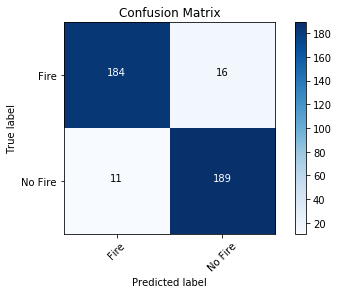

In [30]:
cm_plot_labels = ['Fire' , 'No Fire']
plot_confusion_matrix(cm, cm_plot_labels, title='Confusion Matrix')

In [31]:
data = {'Prediction' : r_pred, 'Actual' : test_label}

In [32]:
df = pd.DataFrame(data)
df

,Prediction,Actual
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
395,1,1
396,1,1
397,1,1
398,1,1


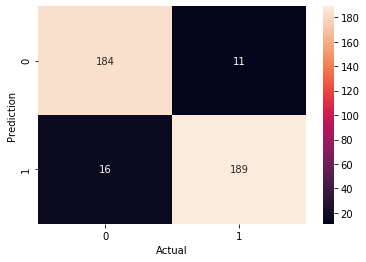

In [33]:
import seaborn 
cm = pd.crosstab(df.Prediction, df.Actual)
seaborn.heatmap(cm, annot = True, fmt = '.0f')

In [34]:
model.save('FNF3_100x100_7k_data.h5')

In [31]:
import PIL
def SinglePred(file):
    im = PIL.Image.open(file)
    im = im.resize((100,100))
    array = np.asarray(im)
    array = np.reshape(array, (-1, 1,100,100))
    plt.imshow(im)
    x = model.predict(array)
    if (x >= 0.5).all():
        print('Not Fire')
    else:
        print('Fire')

Fire


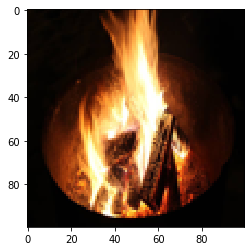

In [32]:
SinglePred(r"C:\Users\Ravindra Singh\Desktop\FNF\test\fire\istockphoto-504240925-612x612.jpg")

Not Fire


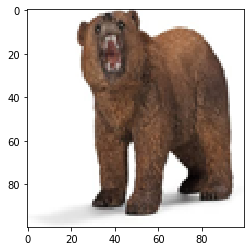

In [33]:
SinglePred(r"C:\Users\Ravindra Singh\Desktop\FNF\test\no_fire\1971d6e226.jpg")

Not Fire


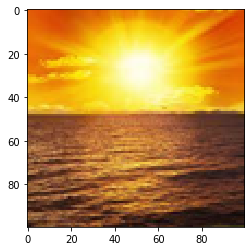

In [34]:
SinglePred(r"C:\Users\Ravindra Singh\Desktop\FNF\train\no_fire\download (24).jpeg")

Fire


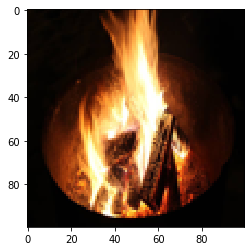

In [35]:
SinglePred(r"C:\Users\Ravindra Singh\Desktop\FNF\test\fire\istockphoto-504240925-612x612.jpg")